# Predictions of the Outcome of Kickstarter Campaigns

Kickstarter is a crowdfunding platform with a community of more than 10 million people comprising of creative, tech enthusiasts who help in bringing new projects to life.

Until now, more than $3 billion dollars have been contributed by the members in fueling creative projects. The projects can be literally anything – a device, a game, an app, a film etc.

Kickstarter works on all or nothing basis: a campaign is launched with a certain amount they want to raise, if it doesn’t meet its goal, the project owner gets nothing. For example: if a projects’s goal is 5000 USD. Even if it gets funded till $4999, the project won’t be a success.

If you have a project that you would like to post on Kickstarter now, can you predict whether it will be successfully funded or not? Looking into the dataset, what useful information can you extract from it, which variables are informative for your prediction and can you interpret the model?

The goal of this project is to build a classifier to predict whether a project will be successfully funded or not. You can use the algorithm of your choice.

In [104]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

import model
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload

%autoreload 2

pd.options.display.max_columns = None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
df = pd.read_csv('data.zip', index_col='id')

In [115]:
df[df['evaluation_set']==True]

,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1569898085,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Honeycomb Farm-to-Cupcakes,Gourmet cupcakes made with high quality pastur...,2000.0,honeycomb-farm-to-table-cupcakes,False,US,USD,$,True,1452834000,1449578222,1449580843,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
308824265,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Melted Crayons Entertainment,Entertainment platform for aspiring artists of...,2000.0,melted-crayons-entertainment,False,CA,CAD,$,True,1460791734,1455580978,1455611334,0.723816,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""CA"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
341566518,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",YouTube,A creative mind without the right tools to vis...,1600.0,youtube-0,False,US,USD,$,True,1412268238,1409619133,1409676238,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
898202473,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","A book by Tiny House, Tiny Footprint","Roll with Kathleen, Greg + Blaize in a Camper ...",10000.0,a-book-by-tiny-house-tiny-footprint,False,US,USD,$,True,1478699572,1475449649,1476103972,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.91,""should_show_...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
1383882757,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",CUBIE,"CUBIE lives. I want to ramp up funds to $2,00...",200.0,cubie,False,US,USD,$,True,1351452415,1348768077,1349724415,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605900449,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Aloneliness,An original dance piece that embodies the mome...,1800.0,aloneliness,False,US,USD,$,True,1462892160,1457993015,1461078147,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,True
759458017,"{""small"":""https://

In [116]:
df.head()

,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set
id,,,,,,,,,,,,,,,,,,,,,,,,,,
805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,125000.0,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,True,1447162860,1444518329,1444673815,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,9800.0,american-politics-policy-power-and-profit,False,US,USD,$,True,1351709344,1348156038,1349117344,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False
1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",2500.0,drew-jacobs-official-kiss-me-music-video,False,US,USD,$,True,1475174031,1473271187,1473359631,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False
658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,10000.0,still-loved,False,GB,GBP,Â£,False,1400972400,1395937256,1397218790,1.680079,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False
1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,5500.0,nine-blackmons-hater-film-project,False,US,USD,$,True,1425963600,1422742820,1423321493,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False


In [132]:
df['name_work_count'] = df.name.str.split().str.len()

In [134]:

df.head()

,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set,name_word_count,name_work_count
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,125000.0,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,True,1447162860,1444518329,1444673815,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,60000,8.0
1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,9800.0,american-politics-policy-power-and-profit,False,US,USD,$,True,1351709344,1348156038,1349117344,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,60000,6.0
1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",2500.0,drew-jacobs-official-kiss-me-music-video,False,US,USD,$,True,1475174031,1473271187,1473359631,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,60000,7.0
658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,10000.0,still-loved,False,GB,GBP,Â£,False,1400972400,1395937256,1397218790,1.680079,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,60000,2.0
1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,5500.0,nine-blackmons-hater-film-project,False,US,USD,$,True,1425963600,1422742820,1423321493,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,60000,5.0


In [145]:
df['country'] = np.where((df['country']!='US')&(df['country']!='GB'), 'Other', df['country'])

In [146]:
df.country.value_counts()

US       48982
Other     6141
GB        4877
Name: country, dtype: int64

In [4]:
    # Extract major and minor categories
    pattern = r'(?<="slug":")(\w*\s*.*)(?=")'
    df['short_category'] = df.category.str.extract(pattern)
    df[['major_category', 'minor_category']] = df.short_category.str.split('/', n=0, expand=True)

    # Update goal values to USD for non US countries
    df["usa"] = df["country"] == "US"
    df["goal_usd"] = df["goal"] * df["static_usd_rate"]
    df["goal_usd"] = df["goal_usd"].astype(int)
    


In [5]:
    # calculate duration of fundraising and time to launch
    unix_seconds_per_day = 86400
    df['duration'] = df.deadline - df.launched_at
    df['duration'] = df['duration'].div(unix_seconds_per_day).abs().astype(int)
    df['time_to_launch'] = df.launched_at - df.created_at
    df['time_to_launch'] = df['time_to_launch'].div(unix_seconds_per_day).abs().astype(int)

In [6]:
    # Add features
    df['blurb_length'] = df.blurb.str.len()
    df['name_length'] = df.name.str.len()
    df['slug_length'] = df.slug.str.len()

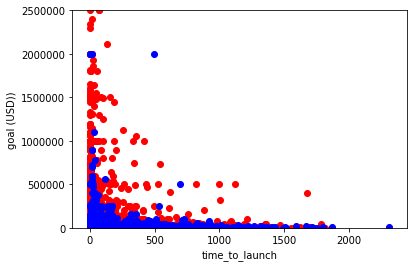

In [7]:
plt.scatter((df.loc[df['state']==0,'time_to_launch']), (df.loc[df['state']==0,'goal_usd']), c='red', marker='o', label='class 0')
plt.scatter((df.loc[df['state']==1,'time_to_launch']), (df.loc[df['state']==1,'goal_usd']), c='blue', marker='o', label='class 0')

# plt.scatter(df[df['state']==0, df['time_to_launch']], df[df['state']==0, df['goal_usd']], marker='o', label='class 0')
# plt.scatter(df[df['state']==1, df['time_to_launch']], df[df['state']==1, df['goal_usd']], marker='x', label='class 1')
plt.xlabel('time_to_launch')
plt.ylim(0, 2500000)
plt.ylabel('goal (USD))')
# plt.legend()
plt.show();

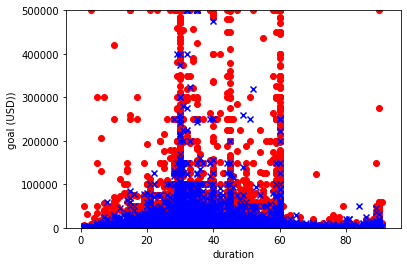

In [8]:
plt.scatter((df.loc[df['state']==0,'duration']), (df.loc[df['state']==0,'goal_usd']), c='red', marker='o', label='class 0')
plt.scatter((df.loc[df['state']==1,'duration']), (df.loc[df['state']==1,'goal_usd']), c='blue', marker='x', label='class 0')

# plt.scatter(df[df['state']==0, df['time_to_launch']], df[df['state']==0, df['goal_usd']], marker='o', label='class 0')
# plt.scatter(df[df['state']==1, df['time_to_launch']], df[df['state']==1, df['goal_usd']], marker='x', label='class 1')
plt.xlabel('duration')
plt.ylim(0, 500000)
plt.ylabel('goal (USD))')
# plt.legend()
plt.show();

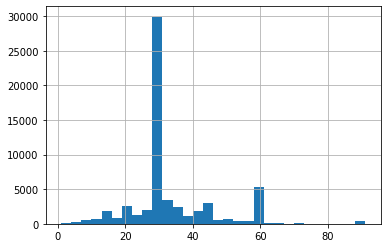

In [9]:
df.duration.hist(bins=30);

In [10]:
    # Launch Day / Month
    df['launch_dt'] = pd.to_datetime(df['launched_at'], unit='s')
    df['launch_month'] = pd.DatetimeIndex(df['launch_dt']).month
    df['launch_year'] = pd.DatetimeIndex(df['launch_dt']).year
    df['launch_day'] = pd.DatetimeIndex(df['launch_dt']).day

In [11]:
df['total_count'] = 1

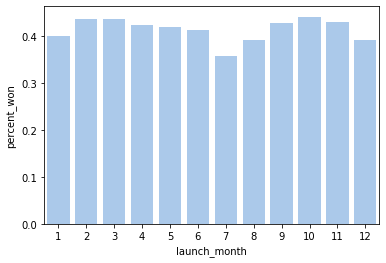

In [12]:
grouped = df.groupby(['launch_month']).sum()
grouped['percent_won'] = grouped.state / grouped.total_count
sns.set_color_codes("pastel")
sns.barplot(x=grouped.index, y=grouped.percent_won, 
           label="Total", color="b");

In [13]:
df.head()

,photo,name,blurb,goal,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,created_at,launched_at,static_usd_rate,creator,location,category,profile,urls,source_url,friends,is_starred,is_backing,permissions,state,evaluation_set,short_category,major_category,minor_category,usa,goal_usd,duration,time_to_launch,blurb_length,name_length,slug_length,launch_dt,launch_month,launch_year,launch_day,total_count
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
805910621,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",DOCUMENTARY FILM titled FROM RAGS TO SPIRITUAL...,A MOVIE ABOUT THE WILLINGNESS TO BREAK FREE FR...,125000.0,movie-made-from-book-titled-from-rags-to-spiri...,False,US,USD,$,True,1447162860,1444518329,1444673815,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,film & video/movie theaters,film & video,movie theaters,True,125000,28,1,134.0,53.0,50,2015-10-12 18:16:55,10,2015,12,1
1279627995,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","American Politics, Policy, Power and Profit",Everything you should know about really big go...,9800.0,american-politics-policy-power-and-profit,False,US,USD,$,True,1351709344,1348156038,1349117344,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,0.0,False,publishing/nonfiction,publishing,nonfiction,True,9800,30,11,131.0,43.0,41,2012-10-01 18:49:04,10,2012,1,1
1306016155,"{""small"":""https://ksr-ugc.imgix.net/assets/013...","Drew Jacobs Official ""Kiss Me"" Music Video","Be a part of the new ""Kiss Me"" Official Music ...",2500.0,drew-jacobs-official-kiss-me-music-video,False,US,USD,$,True,1475174031,1473271187,1473359631,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,music/country & folk,music,country & folk,True,2500,21,1,52.0,42.0,40,2016-09-08 18:33:51,9,2016,8,1
658851276,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Still Loved,When their dreams are shattered by the loss of...,10000.0,still-loved,False,GB,GBP,Â£,False,1400972400,1395937256,1397218790,1.680079,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,1.0,False,film & video/documentary,film & video,documentary,False,16800,43,14,120.0,11.0,11,2014-04-11 12:19:50,4,2014,11,1
1971770539,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Nine Blackmon's HATER Film Project,HATER is a mock rock doc about why the Rucker ...,5500.0,nine-blackmons-hater-film-project,False,US,USD,$,True,1425963600,1422742820,1423321493,1.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...","{""web"":{""project"":""https://www.kickstarter.com...",h

In [14]:
columns_to_drop = ['photo', 'name', 'blurb', 'slug', 'friends', 'is_starred', 'is_backing',
                       'permissions', 'currency_symbol', 'creator', 'profile', 'urls',
                       'source_url', 'short_category', 'category', 'goal', 'disable_communication',
                       'deadline', 'created_at', 'location', 'launched_at', 'static_usd_rate',
                       'currency', 'currency_trailing_code', 'name_length', 'slug_length', 'country', 'launch_dt']
df.drop(columns_to_drop, axis=1, inplace=True)
df.head() 


,state,evaluation_set,major_category,minor_category,usa,goal_usd,duration,time_to_launch,blurb_length,launch_month,launch_year,launch_day,total_count
id,,,,,,,,,,,,,
805910621,0.0,False,film & video,movie theaters,True,125000,28,1,134.0,10,2015,12,1
1279627995,0.0,False,publishing,nonfiction,True,9800,30,11,131.0,10,2012,1,1
1306016155,1.0,False,music,country & folk,True,2500,21,1,52.0,9,2016,8,1
658851276,1.0,False,film & video,documentary,False,16800,43,14,120.0,4,2014,11,1
1971770539,0.0,False,film & video,narrative film,True,5500,30,6,125.0,2,2015,7,1


In [15]:
categorical_columns = ['major_category', 'minor_category']

In [16]:
# create dummies (for LogisticRegression)

dummy_cols = pd.DataFrame
for col in categorical_columns:
    dummy_cols = pd.get_dummies(df[col])
    df = pd.concat([df, dummy_cols], axis=1)
    del df[col]


In [17]:
# change categorical features in type category (for Decision Tree)
# for col in categorical_columns:
#     df[col] = df[col].astype('category')
#     df[col] = df[col].cat.codes

In [18]:
df.dropna(inplace=True)

In [19]:
columns_to_scale = ['goal_usd', 'duration', 'time_to_launch', 'blurb_length']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [44]:
df = df[df.evaluation_set==0]
features = df.drop('state', axis=1)
target = df['state']

In [45]:
# pca = PCA(n_components=9)
# features = pca.fit_transform(features)
# pca_df = pd.DataFrame(columns=['PC{}'.format(x) for x in range(1, pca.n_components_ + 1)],
#                           index=[0])
# pca_df.iloc[0, :] = np.cumsum(pca.explained_variance_ratio_) * 100
# display(pca_df)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [82]:
# params = {'max_depth': [10, 11, 12]}
# grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5, verbose=False)
# grid.fit(X_train, y_train)
# display(grid.best_params_)

In [83]:
# params = {'n_neighbors': [3, 5, 7, 11, 15]}
# grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params, cv=5, verbose=False)
# grid.fit(X_train, y_train)
# display(grid.best_params_)

In [97]:
params = {'penalty': ['l1'],
         'C': [100, 1000]}
grid = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, verbose=False)
grid.fit(X_train, y_train)



/Users/Graham/miniconda3/envs/ads2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Graham/miniconda3/envs/ads2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Graham/miniconda3/envs/ads2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Graham/miniconda3/envs/ads2/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/Graham/miniconda3/envs/ads2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432:

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 1000], 'penalty': ['l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [98]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,57.367188,11.845474,0.099216,0.005291,100,l1,"{'C': 100, 'penalty': 'l1'}",0.71400,0.715125,0.711125,0.7105,0.69855,0.70986,0.005912,2
1,14.999164,11.469945,0.095155,0.002495,1000,l1,"{'C': 1000, 'penalty': 'l1'}",0.71475,0.715000,0.710000,0.7110,0.69880,0.70991,0.005898,1


In [99]:
grid.best_params_

{'C': 1000, 'penalty': 'l1'}

ValueError: x and y must have same first dimension, but have shapes (1,) and (2,)

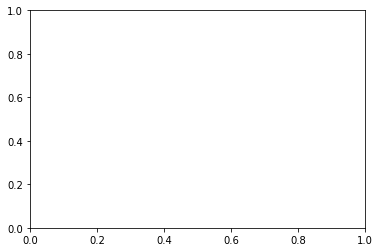

In [100]:
# model = LogisticRegression()
# model.fit(X_train, y_train)
# y_hat = model.predict(X_test)
# accuracy = accuracy_score(y_hat, y_test)
# print('Accuracy is {}'.format(accuracy.round(3)))

In [28]:
# model = KNeighborsClassifier(n_neighbors=7)
# model.fit(X_train, y_train)
# y_hat = model.predict(X_test)
# accuracy = accuracy_score(y_hat, y_test)
# print('Accuracy is {}'.format(accuracy.round(3)))

In [29]:
# dtc = DecisionTreeClassifier(max_depth=10)
# dtc.fit(X_train, y_train)
# y_hat = dtc.predict(X_test)
# accuracy = accuracy_score(y_hat, y_test)
# print('Accuracy is {}'.format(accuracy.round(3)))

Accuracy is 0.691


In [ ]:
# display(X_train.head())
# display(y_train.head())
# display(X_test.head())
# X_train.columns

In [ ]:
# dtc = model.train(X_train, y_train)

In [ ]:
# y_hat = model.predict(dtc, X_test)